In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("data.csv")
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [3]:
numeric_df = df.select_dtypes(include=np.number)

z_scores = np.abs(stats.zscore(numeric_df))
df_clean = df[(z_scores < 3).all(axis=1)]

df_clean.shape   # show remaining rows

(4238, 18)

In [4]:
X = df_clean[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'yr_built']]
y = df_clean['price']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
pipeline

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [9]:
pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [10]:
predictions = pipeline.predict(X_test)

predictions[:10]   # show first 10 predictions

array([837124.65808328, 502485.85788147, 434733.9909692 , 541863.63093694,
       655504.36230731, 455201.10805662, 535893.63869679, 571695.09945075,
       671423.8752692 , 671620.81614008])

In [11]:
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("MAE:", mae)
print("R² Score:", r2)

MSE: 36797384352.03659
MAE: 133807.13250151067
R² Score: 0.44089265150815393


In [12]:
# Coefficients of the model
coeff = pipeline.named_steps['model'].coef_

# Display with feature names
for feature, c in zip(X.columns, coeff):
    print(f"{feature}: {c}")

bedrooms: -37678.19488314109
bathrooms: 33566.95648366699
sqft_living: 175020.32736514174
floors: 38860.08688059503
yr_built: -80475.04697249256


In [13]:
# Intercept of the model
intercept = pipeline.named_steps['model'].intercept_
print("Intercept:", intercept)


Intercept: 497612.6081083518


In [17]:
y_scaler = StandardScaler()
# y must be reshaped to 2D for scaling
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train_scaled, y_test_scaled = train_test_split(
    X, y_scaled, test_size=0.2, random_state=42
)
pipeline = Pipeline([
    ('scaler', StandardScaler()),    # scale features
    ('model', LinearRegression())
])
pipeline.fit(X_train, y_train_scaled)
y_pred_scaled = pipeline.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_original = y_scaler.inverse_transform(y_test_scaled.reshape(-1, 1))
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test_original, y_pred)
mae = mean_absolute_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R² Score:", r2)

MSE: 36797384352.0366
MAE: 133807.1325015107
R² Score: 0.4408926515081538


In [27]:
# Updated coefficients after scaling X and y
coeff_updated = pipeline.named_steps['model'].coef_

# Display with feature names
for feature, c in zip(X.columns, coeff):
    print(f"{feature}: {c}")

bedrooms: -37678.19488314109
bathrooms: 33566.95648366699
sqft_living: 175020.32736514174
floors: 38860.08688059503
yr_built: -80475.04697249256


In [19]:
# Updated intercept
intercept_updated = pipeline.named_steps['model'].intercept_
print("Updated Intercept:", intercept_updated)


Updated Intercept: [-0.00502815]


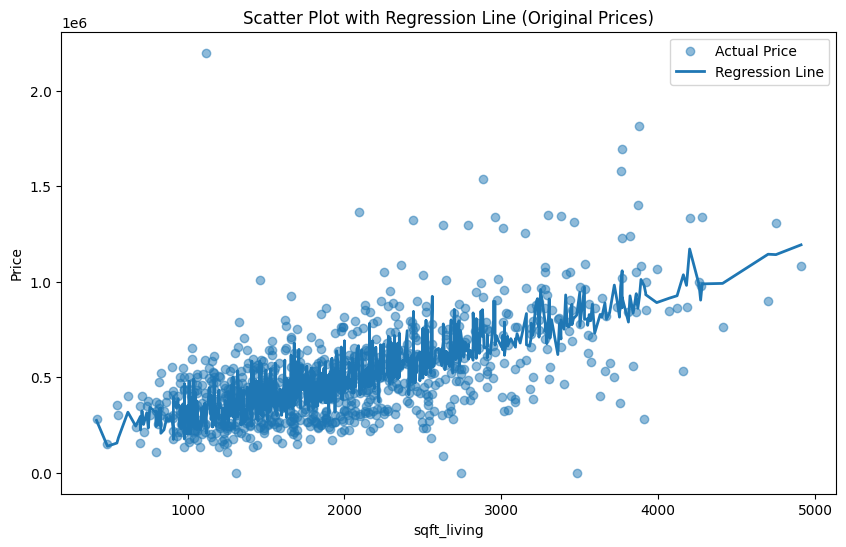

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Choose feature for the line plot
feature = "sqft_living"

# X values
X_feature = X_test[feature].values

# Convert scaled predictions back to original prices
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_original = y_scaler.inverse_transform(y_test_scaled.reshape(-1, 1))

# Sort for a smooth line
sorted_idx = np.argsort(X_feature)
X_sorted = X_feature[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

# Plot
plt.figure(figsize=(10, 6))

# Scatter = actual prices
plt.scatter(X_feature, y_test_original, alpha=0.5, label="Actual Price")

# Regression line = predicted prices
plt.plot(X_sorted, y_pred_sorted, linewidth=2, label="Regression Line")

plt.xlabel(feature)
plt.ylabel("Price")
plt.title("Scatter Plot with Regression Line (Original Prices)")
plt.legend()
plt.show()


In [29]:
df_clean

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,2014-05-02 00:00:00,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
